In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [3]:
df_comp = raw_csv_data.copy()
df_comp

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [4]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [9]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Plotting the data

In [10]:
df_comp.columns

Index(['date', 'spx', 'dax', 'ftse', 'nikkei'], dtype='object')

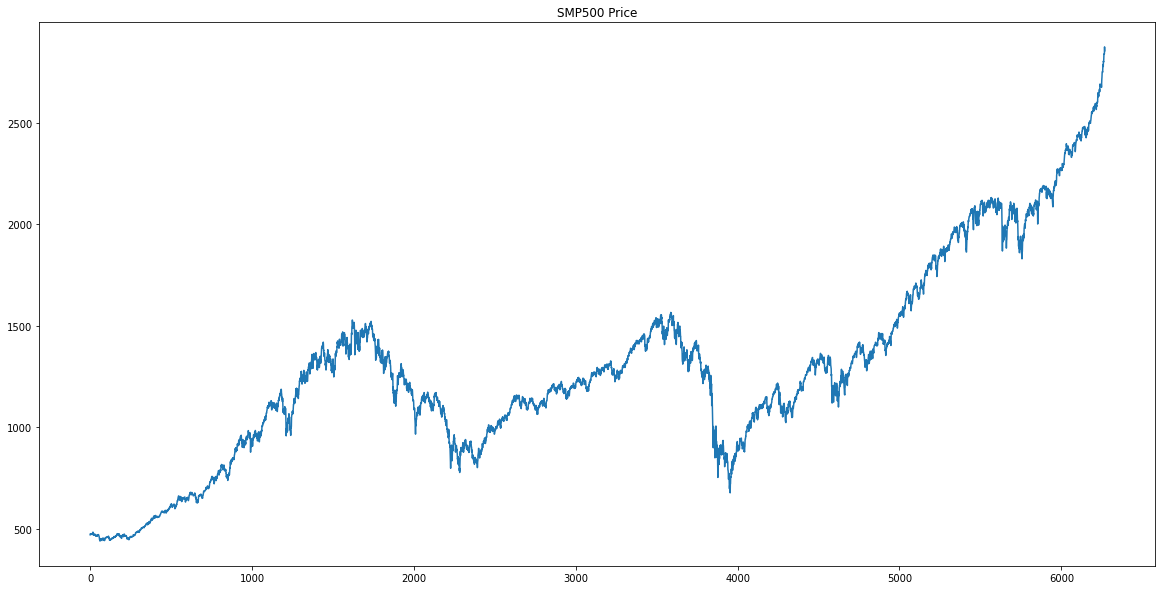

In [14]:
plt.figure(figsize=(20,10))
df_comp.spx.plot()
plt.title("SMP500 Price")
plt.show()

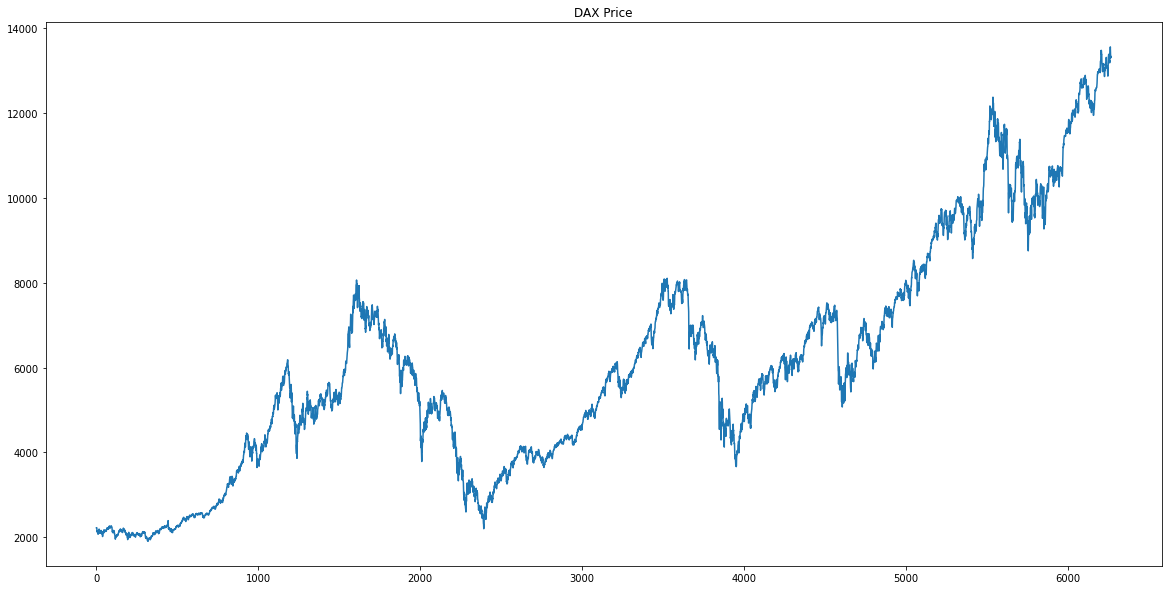

In [15]:
plt.figure(figsize=(20,10))
df_comp.dax.plot()
plt.title("DAX Price")
plt.show()

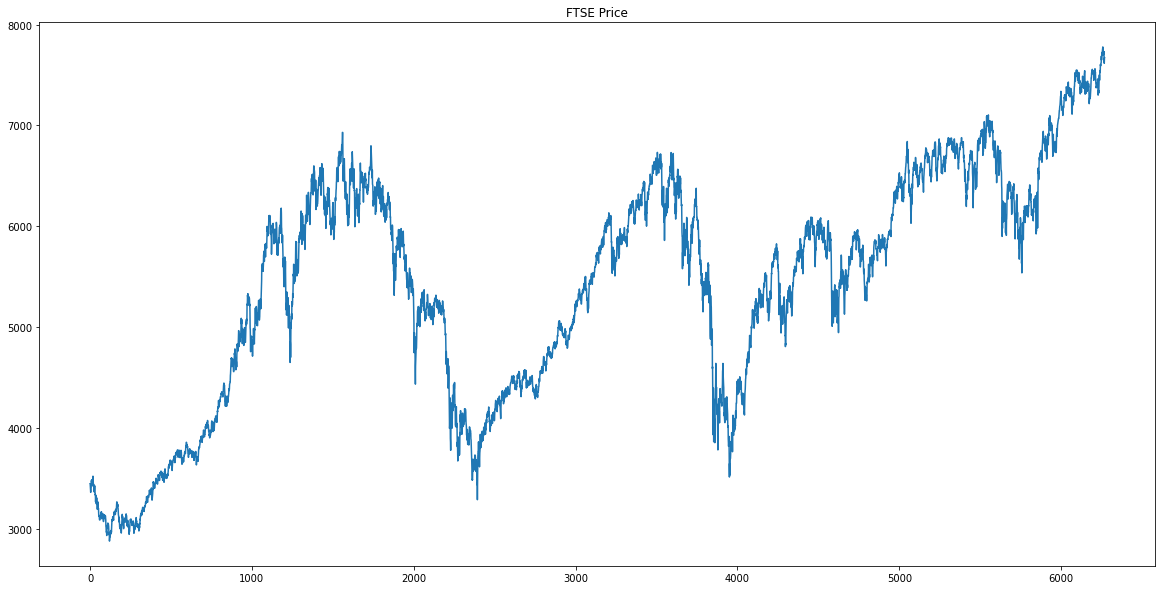

In [16]:
plt.figure(figsize=(20,10))
df_comp.ftse.plot()
plt.title("FTSE Price")
plt.show()

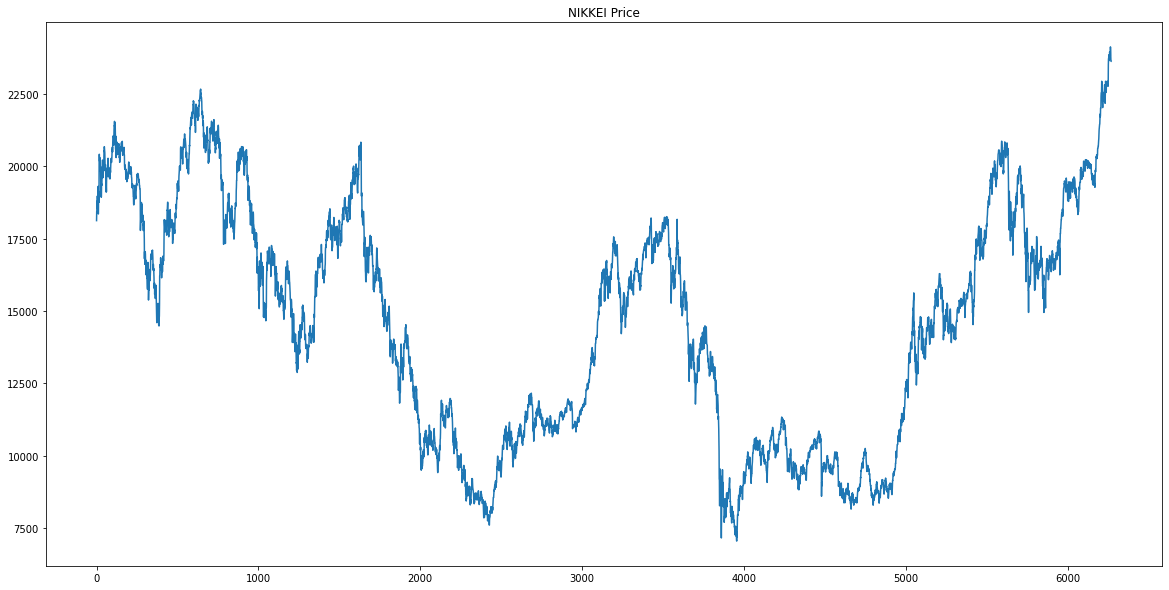

In [17]:
plt.figure(figsize=(20,10))
df_comp.nikkei.plot()
plt.title("NIKKEI Price")
plt.show()

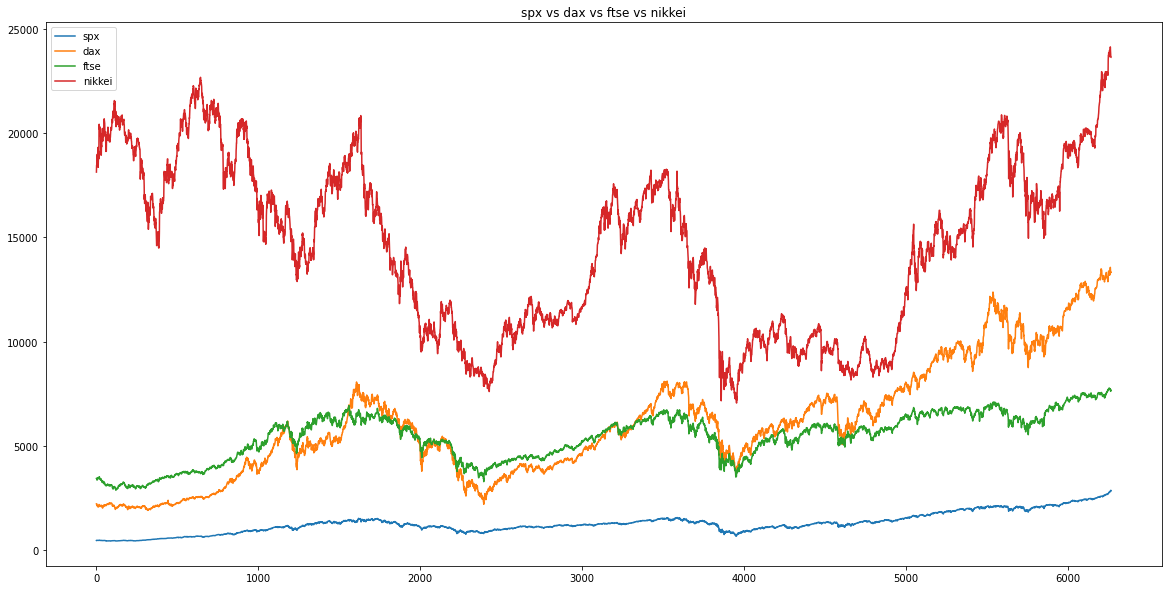

In [19]:
## plotting all graphs in same graph

plt.figure(figsize=(20,10))
df_comp.spx.plot()
df_comp.dax.plot()
df_comp.ftse.plot()
df_comp.nikkei.plot()
plt.title("spx vs dax vs ftse vs nikkei")
plt.legend()
plt.show()

QQ Plot

In [21]:
import scipy.stats
import pylab

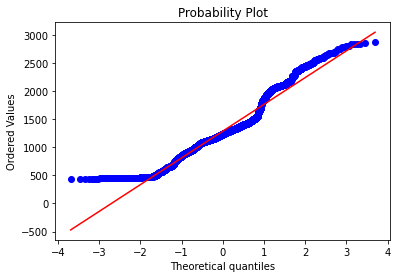

In [23]:
scipy.stats.probplot(df_comp.spx,plot=pylab)
plt.show()

## no data not distributed

Working with the time

In [24]:
df_comp.date.describe()

count           6269
unique          6269
top       15/11/2000
freq               1
Name: date, dtype: object

In [25]:
## from text to date

df_comp.date = pd.to_datetime(df_comp.date,dayfirst=True)

In [26]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [27]:
df_comp.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

Setting the index

In [28]:
df_comp.set_index("date",inplace=True)

In [29]:
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


Setting the desired frequencies to make Time Series

In [32]:
df_comp = df_comp.asfreq('b')

In [33]:
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


Handling missing values

In [34]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [35]:
df_comp.columns

Index(['spx', 'dax', 'ftse', 'nikkei'], dtype='object')

In [36]:
## with front filling

df_comp.spx = df_comp.spx.fillna(method="ffill")

In [38]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [39]:
## ## with back filling

df_comp.dax = df_comp.dax.fillna(method="bfill")

In [40]:
## ## with mean()

df_comp.ftse = df_comp.ftse.fillna(value=df_comp.ftse.mean())
df_comp.nikkei = df_comp.nikkei.fillna(value=df_comp.nikkei.mean())

In [41]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Simplifying the DataFrame

In [42]:
df_comp['market_value'] = df_comp.spx
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.317840,5422.713545,14597.055700,1288.642547
std,487.868210,2755.380039,1144.842066,4040.545253,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10711.090000,992.715221
50%,1233.761241,5774.260000,5661.880000,15014.040000,1233.761241
75%,1460.250000,7445.560000,6303.300000,17858.420000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [43]:
df_comp.drop(columns=['spx'],inplace=True)

In [44]:
df_comp

,dax,ftse,nikkei,market_value
date,,,,
1994-01-07,2224.95,3445.980000,18124.01,469.900000
1994-01-10,2225.00,3440.580000,18443.44,475.270000
1994-01-11,2228.10,3413.770000,18485.25,474.130000
1994-01-12,2182.06,3372.020000,18793.88,474.170000
1994-01-13,2142.37,3360.010000,18577.26,472.470000
...,...,...,...,...
2018-01-23,13559.60,7731.827774,24124.15,2839.130362
2018-01-24,13414.74,7643.428966,23940.78,2837.544008
2018-01-25,13298.36,7615.839954,23669.49,2839.253031


In [45]:
df_comp.drop(columns=['dax','ftse','nikkei'],inplace=True)

In [47]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


Shuffel the data

In [49]:
## identifying the size value 80 20 ratio  df=>> for train  df_test ==>> for test

size = int(len(df_comp)*0.8)
size

5021

In [50]:
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [51]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [52]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


White Noise

In [53]:
wn = np.random.normal(loc=df.market_value.mean(),scale=df.market_value.std(),size=len(df))

In [54]:
df['wn']=wn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1089.689833
std,292.559287,293.059305
min,438.920000,99.184746
25%,914.620000,894.932840
50%,1144.650000,1085.966362
75%,1316.280729,1284.839524
max,1570.252238,2186.973803


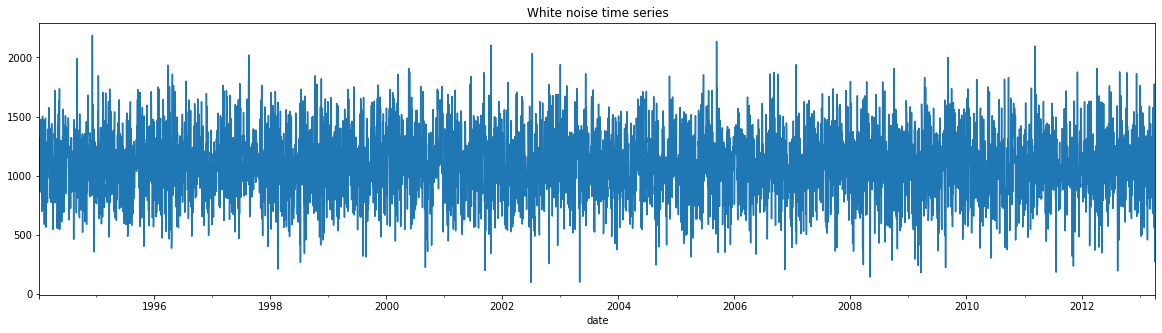

In [59]:
plt.figure(figsize=(20,5))
df.wn.plot()
plt.title("White noise time series")
plt.show()

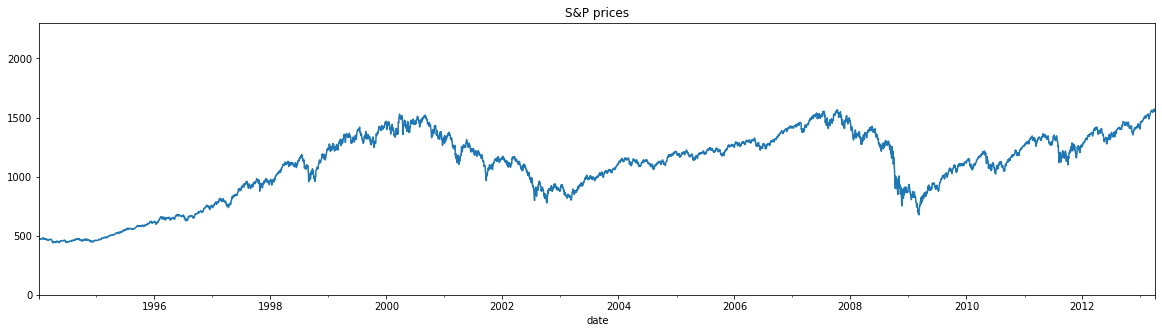

In [62]:
## for comparision with market value plot

plt.figure(figsize=(20,5))
df.market_value.plot()
plt.ylim(0,2300)
plt.title("S&P prices")
plt.show()

